In [14]:
%pylab inline

sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
#import io_sims as ios
import gizmo_analysis as ga
import pynbody
import halo_analysis as halo
#import pynbody_routines  as pr
#import FIRE_analysis as fa

from astropy import units as u
import nba
import healpy as hp
from  healpy.newvisufunc import projview, newprojplot

import Corrfunc
from Corrfunc.mocks.DDtheta_mocks  import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf
#from FIRE_analysis import mollweide_projection
from astropy.coordinates import Angle

from scipy import linalg
from matplotlib import colors

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/mnt/sw/nix/store/1bljgds808py1sq0av8nn8izvjnpfsbs-python-3.9.15-view/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


ModuleNotFoundError: No module named 'halo_utilites'

In [5]:
## Tracking subhalos using their index at 300th snap (using only merger tree)
def return_tracked_pos(tr_ind_at300):
    # Adapted from Arpit's function
    h_index = tr_ind_at300
    tree_ind = []
    for _ in range(300,601):
        tree_ind.append(h_index)
        h_index = halt['descendant.index'][h_index]
    tree_ind = np.array(tree_ind)
    position = halt['host.distance'][tree_ind]
    nsnaps = halt['snapshot'][tree_ind]
    mass = halt['mass'][tree_ind]
    velocity = halt['host.velocity'][tree_ind]
    #vel_rad = halt['host.velocity.rad'][tree_ind]
    #vel_tan = halt['host.velocity.tan'][tree_ind]
    
    return {'position': position,
            'snaps' : nsnaps,
            'mass' : mass,
            'velocity' : velocity,
           }

In [6]:
sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/"

In [12]:
m12b_subhalos = halo.io.IO.read_catalogs('index', 600, sim_directory)
# Tree
halt = halo.io.IO.read_tree(simulation_directory=sim_directory)



# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 39597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 39597 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5



In [13]:
m12b_subhalos = halo.io.IO.read_catalogs('index', 600, sim_directory)
m12b_subhalos['mass.200m'][m12b_subhalos.prop('host.distance.total')==0]

array([1.1821225e+12], dtype=float32)

In [59]:
halo.

SimArray([38838, 20256,  6686], '1.00e+10 Msol')

In [71]:
hsub = pr.pynbody_subhalos(m12b_subhalos)




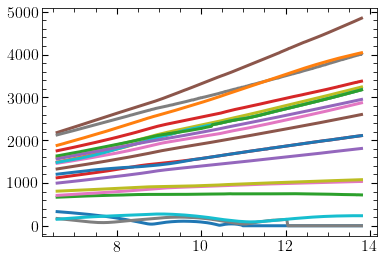

In [73]:
for i in range(1, 21):
    sat_id = np.argsort(hsub.dark['mass'])[-(i+1)]
    sat_tree_id = m12b_subhalos['tree.index'][sat_id]
    satellite_1 = fa.return_tracked_pos(halt, sat_tree_id, pynbody_halo=True)
    sat_pos_1 = np.sqrt(np.sum(satellite_1['pos']**2, axis=1))
    plt.plot(t_snap[300:], sat_pos_1)

    #sellite_faceon = satellite

In [68]:
times = '/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt'.format('m12b')
t_snap = np.loadtxt(times, usecols=3)


In [69]:
sat_pos_1 = np.sqrt(np.sum(satellite_1['pos']**2, axis=1))
sat_pos_2 = np.sqrt(np.sum(satellite_2['pos']**2, axis=1))
sat_pos_3 = np.sqrt(np.sum(satellite_3['pos']**2, axis=1))
sat_pos_4 = np.sqrt(np.sum(satellite_4['pos']**2, axis=1))

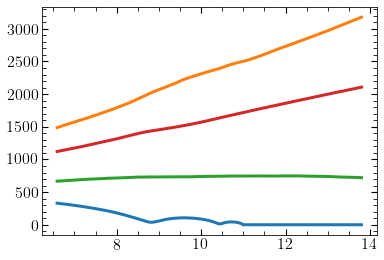

In [70]:
plt.plot(t_snap[300:], sat_pos_1)
plt.plot(t_snap[300:], sat_pos_2)
plt.plot(t_snap[300:], sat_pos_3)
plt.plot(t_snap[300:], sat_pos_4)